In [1]:
# Import the relevant Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create 9 grid points for the model parameter p, from 0.1 to 0.9 spaced 0.1 apart
p = np.arange(0.1, 1, 0.1)

# Since all parameters are uniformly distributed and equally likely, the probability of each parameter on the grid is 1/n = 1/9
prior = 1/len(p)

# Create a Pandas dataframe with the relevant columns of PML framework to store calculations for different values of p
earnings_beat = pd.DataFrame(columns = ['parameter', 'prior', 'likelihood', 'posterior*', 'posterior'])

# Store each parameter value
earnings_beat['parameter'] = p

# Loop computes the unnormalized posterior probability distribution for each value of the parameter
for i in range(0,len(p)):
  earnings_beat.iloc[i,1] = prior
  # Since our training data has three earnings beats in a row, each having a probability of p and assuming i.i.d
  earnings_beat.iloc[i,2] = p[i]**3
  # Use the unnormalized inverse probability rule
  earnings_beat.iloc[i,3] = prior * (p[i]**3)

# Normalize the probability distribution so that all values of the pmf add up to 1
earnings_beat['posterior'] = earnings_beat['posterior*']/sum(earnings_beat['posterior*'])

# Display the data frame to show each parameter value for p
earnings_beat

,parameter,prior,likelihood,posterior*,posterior
0,0.1,0.111111,0.001,0.000111,0.000494
1,0.2,0.111111,0.008,0.000889,0.003951
2,0.3,0.111111,0.027,0.003,0.013333
3,0.4,0.111111,0.064,0.007111,0.031605
4,0.5,0.111111,0.125,0.013889,0.061728
5,0.6,0.111111,0.216,0.024,0.106667
6,0.7,0.111111,0.343,0.038111,0.169383
7,0.8,0.111111,0.512,0.056889,0.25284
8,0.9,0.111111,0.729,0.081,0.36


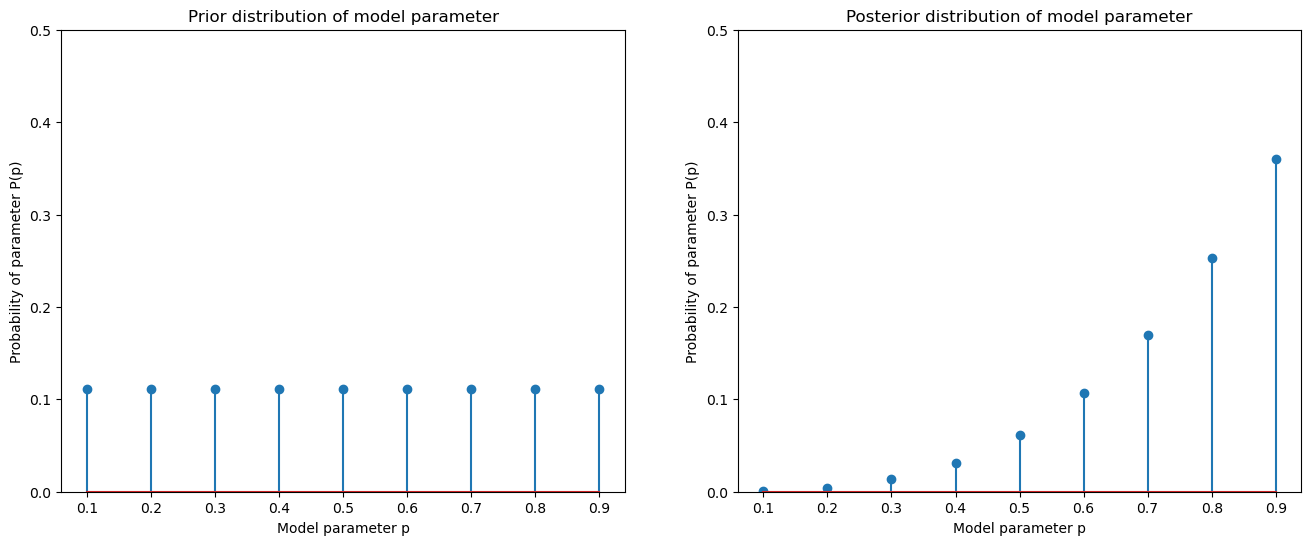

In [3]:
# Plot the prior and posterior probability distribution for the model parameter p
plt.figure(figsize=(16,6)), plt.subplot(1,2,1), plt.ylim([0,0.5])
plt.stem(earnings_beat['parameter'],earnings_beat['prior'])
plt.xlabel('Model parameter p'), plt.ylabel('Probability of parameter P(p)'), plt.title('Prior distribution of model parameter')

plt.subplot(1,2,2), plt.ylim([0,0.5])
plt.stem(earnings_beat['parameter'],earnings_beat['posterior'])
plt.xlabel('Model parameter p'), plt.ylabel('Probability of parameter P(p)'), plt.title('Posterior distribution of model parameter')
plt.show();

In [4]:
# Since P(y_i=1|p_i) = p_i, we compute the probability weighted average of observing y=1 using the prior probabilities as weights
# This probability weighted average gives us the prior predictive probability of observing y=1 before observing any data
prior_predictive_1 = sum(earnings_beat['parameter'] * earnings_beat['prior'])

# The prior predictive probability of observing outcome y=0 is the complement of P(y=1) calculated above
prior_predictive_0 = 1 - prior_predictive_1

# Since we have picked a uniform distribution for our parameter, our model expects both outcomes to be equally likely prior to observing any data
prior_predictive_0, prior_predictive_1

(0.5, 0.5)

In [5]:
# Since P(y_i=1|p_i) = p_i, we compute the probability weighted average of observing y=1 but now we use the posterior probabilities as the weights
# Posterior probability distribution has updated the parameter distribution given the training data and prior knowledge about the parameters
# This probability weighted average gives us the posterior predictive probability of observing y=1 after observing in-sample data D={y1=1, y2=1, y3=1}
posterior_predictive_1 = sum(earnings_beat['parameter'] * earnings_beat['posterior'])

# The posterior predictive probability of observing outcome y=0 is the complement of P(y=1|D) calculated above
posterior_predictive_0 = 1- posterior_predictive_1

# After observing data D, our model predicts that observing y=1 is about 3 times more likely than observing y=0
round(posterior_predictive_0,2), round(posterior_predictive_1,2)

(np.float64(0.24), np.float64(0.76))

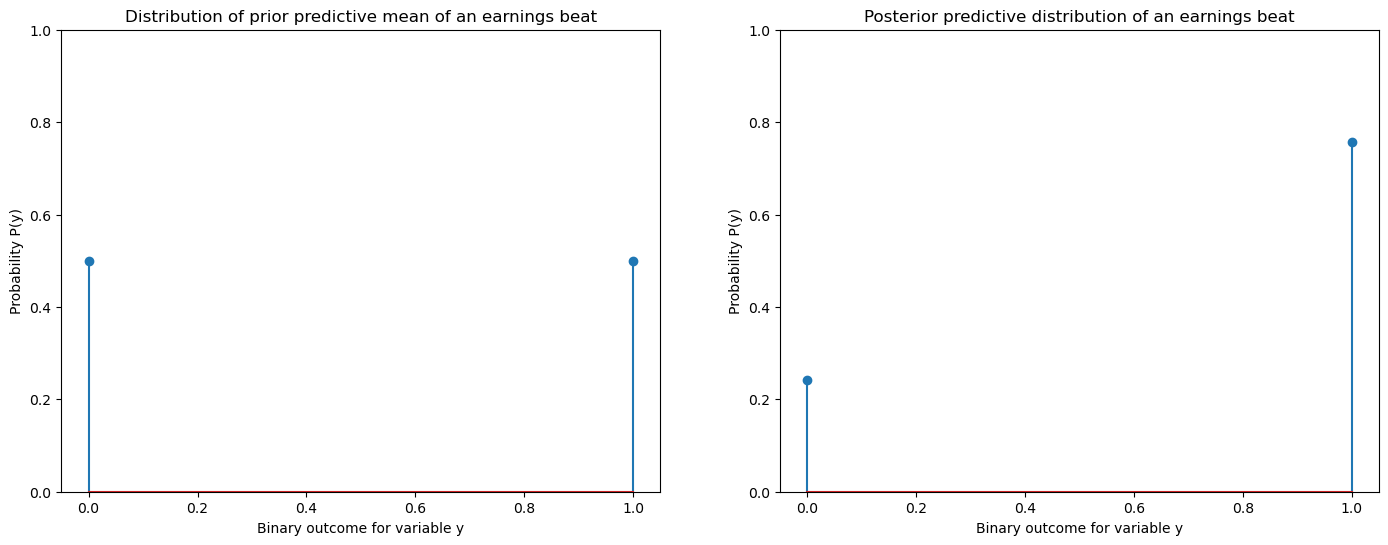

In [6]:
# Plot the prior and posterior predictive probability distribution for the event outcomes
plt.figure(figsize=(17,6)), plt.subplot(1,2,1), plt.ylim([0,1])
plt.stem([0,1],[prior_predictive_0, prior_predictive_1])
plt.xlabel('Binary outcome for variable y'), plt.ylabel('Probability P(y)'), plt.title('Distribution of prior predictive mean of an earnings beat')

plt.subplot(1,2,2), plt.ylim([0,1])
plt.stem([0,1],[posterior_predictive_0, posterior_predictive_1])
plt.xlabel('Binary outcome for variable y'), plt.ylabel('Probability P(y)'), plt.title('Posterior predictive distribution of an earnings beat')
plt.show()

# Markowitz Investor's Ruin

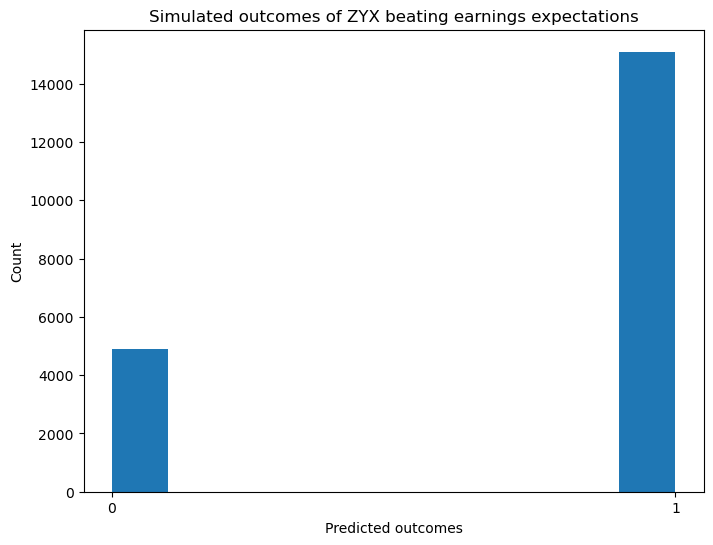

Probability that ZYX will not beat earnings expectations (y=0) is: 0.245
Probability that ZYX will beat earnings expectations (y=1) is: 0.755


In [7]:
# Fix the random seed so numbers can be reproduced
np.random.seed(114)

# Number of posterior predictive samples to simulate
N = 20000

# Draw 100,000 samples from the model's posterior distribution of parameter p
# Random.choice() selects 100,000 values of p from the earnings_beat['parameter'] column using the probabilities in the earnings_beat['posterior'] column.
posterior_samples = np.random.choice(earnings_beat['parameter'], size=100000, p=earnings_beat['posterior'])

# Draw a smaller subset of N random samples from the posterior samples of parameter p
posterior_samples_n = np.random.choice(posterior_samples, size=N)

# Generate N random simulated outcomes by using the model's likelihood function and posterior samples of the parameter p
# Likelihood function is the Bernoulli distribution, a special case of the binomial distribution where number of trials n=1
# Simulated data are the data generated from the posterior predictive distribution of the model
simulated_data = np.random.binomial(n=1, p=posterior_samples_n)

# Plot the simulated data of earnings outcomes y=0 and y=1
plt.figure(figsize=(8,6))
plt.hist(simulated_data)
plt.xticks([0,1])
plt.xlabel('Predicted outcomes')
plt.ylabel('Count')
plt.title('Simulated outcomes of ZYX beating earnings expectations')
plt.show()

# Count the number of data points for each outcome
y_0 = np.sum(simulated_data == 0)
y_1 = np.sum(simulated_data == 1)

# Compute the posterior predictive distribution
print(f"Probability that ZYX will not beat earnings expectations (y=0) is: {y_0/(y_0+y_1):.3f}")
print(f"Probability that ZYX will beat earnings expectations (y=1) is: {y_1/(y_0+y_1):.3f}")


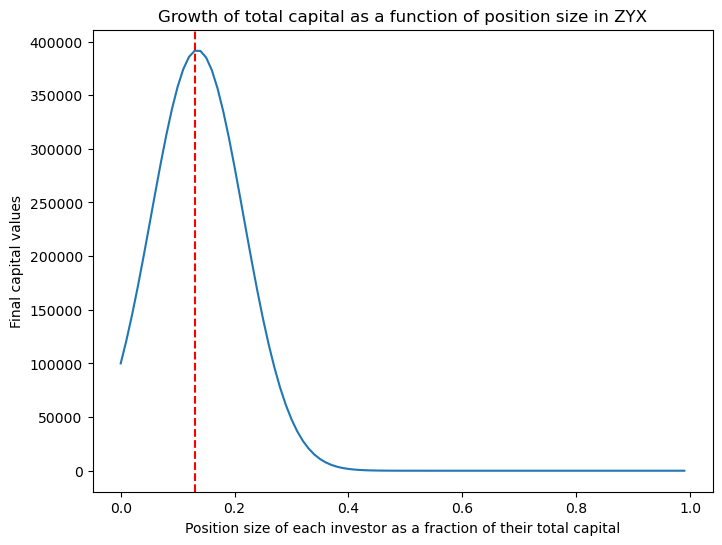

The optimal position size of total capital is 0.13
Initial capital of $100000 grows to a final capital of $391438


In [8]:
# Percentage losses when y=0 and earnings don't beat expectations
loss = -0.15
# Percentage profits when y=1 and earnings beat expectations
profit = 0.05

# Set the starting capital
start_capital = 100000

# Create a list of values for position_size or percentage of total capital invested in ZYX by an investor
position_size = np.arange(0.00, 1.00, 0.01)

# Create an empty list to store the final capital values for each position_size of an investor
final_capital_values = []

# Loop over each value of position_size f to calculate terminal wealth for each investor
for f in position_size:
    # Set the initial capital for this simulation
    capital = start_capital

    # Loop over each simulated data point and calculate the P&L based on y=0 or y=1
    for y in simulated_data:
        if y == 0:
            capital += capital * loss * f
        else:
            capital += capital * profit * f

    # Append the final capital value to the list
    final_capital_values.append(capital)

# Find the value of f, position_size, that maximizes the final capital of each investor
optimal_index = np.argmax(final_capital_values)
optimal_f = position_size[optimal_index]
max_capital = final_capital_values[optimal_index]

# Plot the final capital values as a function of position size, f
plt.figure(figsize=(8,6))
plt.plot(position_size, final_capital_values)
plt.xlabel('Position size of each investor as a fraction of their total capital')
plt.ylabel('Final capital values')
plt.title('Growth of total capital as a function of position size in ZYX')
# Plot a vertical line at the optimal value of f
plt.axvline(x=optimal_f, color='red', linestyle='--')
plt.show()

# Print the optimal value of f and the corresponding final capital
print(f"The optimal position size of total capital is {optimal_f:.2f}")
print(f"Initial capital of ${start_capital:.0f} grows to a final capital of ${max_capital:.0f}")


We can make a few obvious observations based on our simulation:

*   Investors experience different wealth trajectories based on the fraction of the initial capital they invested in this series of hypothetical positive expectation bets (total of 20,000 i.i.d. bets).
*   Investors start losing money if they invested more than 26% of their capital.
All investors who invested more than 40% of their capital are broke.

*   All investors who invested between 1% to 26% of their capital increased their wealth.

*   The investor who invested only 13% of their capital had the greatest amount of terminal wealth. In this investment scenario, 13% of total capital is the Kelly optimal position size for growing one’s wealth.

*   It is important to note that an investor’s risk of ruin is closely related to the position size of their initial capital and not to the volatility of returns of the stochastic process, which is the same for every investor.

*   Most importantly, even if you are willing to accept the related volatility of your investment, there is a limit to how much capital you should allocate to an investment. This is the fatal flaw of MPT/CAPM and reveals the foolishness of using volatility as a measure of risk.

As shown in our simulation, assuming that investing is an ergodic process and optimizing expected value leads to financial ruin for the majority of the investors applying MPT/CAPM principles of using volatility as a proxy for risk and disregarding position size. This is how LTCM justified leveraging its positions arbitrarily highly and disregarding the possibility of financial ruin.